# Credit Score Project

---

## Importing the data

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
# Display dataset with no index column
raw_df = pd.read_csv('train_biased.csv')
df = raw_df.copy()
raw_df

,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,BadShire,North Street,NaN,078-73-5990,Cleaner,39628.99,...,7,11.5,NaN,_,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485,1
99996,0x25fea,CUS_0x942c,May,Nicks,BadShire,North Street,25.0,078-73-5990,Cleaner,39628.99,...,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385,1
99997,0x25feb,NaN,June,Nicks,BadShire,North Street,25.0,078-73-5990,Cleaner,NaN,...,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441,1
99998,0x25fec,CUS_0x942c,July,Nicks,Standhampton,North Street,25.0,078-73-5990,Cleaner,39628.99,...,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603,2


--- 
## EDA (Pre Data Handling)

In [9]:
# General info overview
print("DataFrame information:")
raw_df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate         


Missing value percentage per column:
ID                           9.942
Customer_ID                  9.893
Month                        9.938
Name                        18.887
City                         9.851
Street                       9.920
Age                         14.488
SSN                         10.001
Occupation                   9.944
Annual_Income               10.094
Monthly_Inhand_Salary       23.595
Num_Bank_Accounts            9.833
Num_Credit_Card             10.062
Interest_Rate                9.849
Num_of_Loan                 10.191
Type_of_Loan                20.312
Delay_from_due_date          9.988
Num_of_Delayed_Payment      16.218
Changed_Credit_Limit        10.067
Num_Credit_Inquiries        11.898
Credit_Mix                   9.915
Outstanding_Debt             9.963
Credit_Utilization_Ratio     9.975
Credit_History_Age          18.209
Payment_of_Min_Amount        9.957
Amount_invested_monthly     14.120
Credit_Score                 0.000
dtype: float64


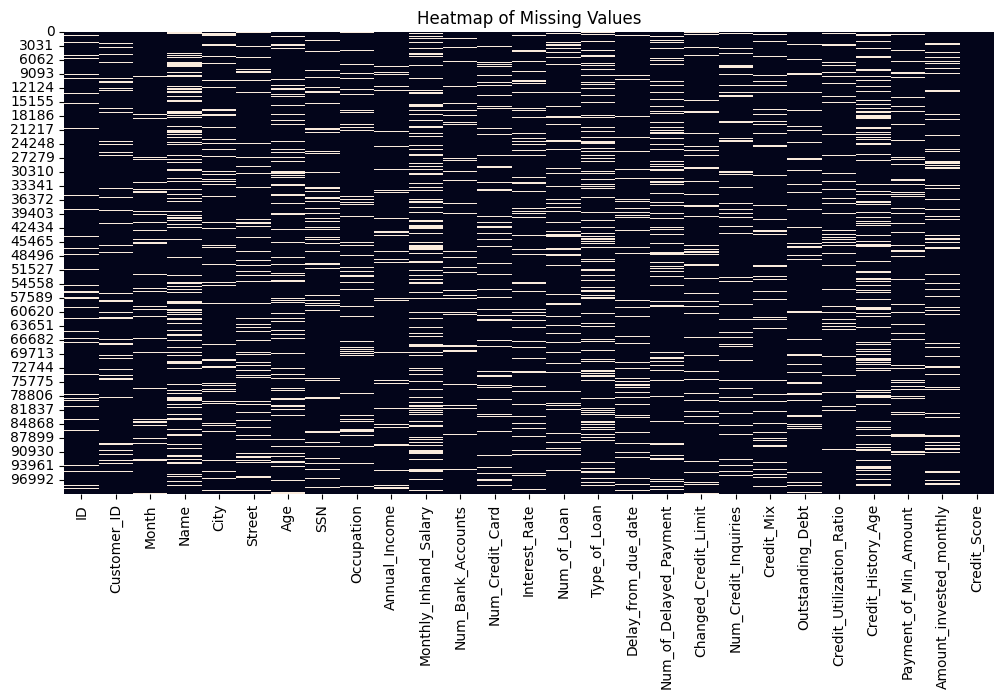

In [10]:
# Missing values overview
print("\nMissing value percentage per column:")
missing_percent = raw_df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)
print(missing_percent)

# Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(raw_df.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

**Overview of the Dataset**

Our dataset comprises **26 feature columns** alongside a fully observed target variable, **Credit_Score**. We see a rich mix of categorical attributes such as Name, City, Credit_Mix and Type_of_Loan and numerical measures like Age, Annual_Income, Interest_Rate, and Outstanding_Debt. This diversity promises strong predictive power but also demands careful, tailored preprocessing.

Most features exhibit **moderate missingness** of around 9–11%, with a few `Monthly_Inhand_Salary` (≈23.6%), `Type_of_Loan` (≈20.3%), `Name` (≈18.9%) and `Num_of_Delayed_Payment` (≈16.2%)—standing out for significantly higher gaps. In the accompanying heatmap of missing values, these columns manifest as more prominent vertical bands, while the rest show scattered “pinpricks” of gaps. That visual immediately guides us to where imputation or selective exclusion will be most critical.

Beyond missing values, many “object”‐typed columns actually hold numeric data and must be converted appropriately.Since **Credit_Score** is complete, our entire cleanup effort can focus on the predictors.

In [11]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
raw_df.describe()


Summary statistics for numerical columns:


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_Score
count,85512.000000,76405.000000,90167.000000,89938.000000,90151.000000,90012.000000,88102.000000,90025.000000,100000.000000
mean,110.226845,4185.789272,17.105172,22.449410,72.343923,21.081156,27.846882,32.290967,1.880640
std,684.907588,3178.560506,117.728215,129.037233,465.684822,14.862707,193.610843,5.114670,0.683065
min,-500.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,24.000000,1625.023750,3.000000,4.000000,8.000000,10.000000,3.000000,28.064418,1.000000
50%,33.000000,3086.683333,6.000000,5.000000,13.000000,18.000000,6.000000,32.318280,2.000000
75%,42.000000,5940.317500,7.000000,7.000000,20.000000,28.000000,9.000000,36.502272,2.000000
max,8698.000000,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,3.000000


**Age**  
The maximum value of 8 698 dwarfs the mean (~110) and even the standard deviation (~685), indicating that these are almost certainly erroneous entries rather than plausible ages.

**Monthly_Inhand_Salary**  
A top salary of 15 204 is about 3.6 times the mean (~4 186) and nearly 4.8 std above it suggesting genuine high earners but also flagging potential outliers that might skew model fitting.

**Num_Bank_Accounts**  
With a maximum of 1 798 compared to a mean of ~17 and a std of ~118, this column contains extreme values that are likely coding errors or misreported counts and will need capping or exclusion.

**Num_Credit_Card**  
The highest count (1 499) is over 66 std above the mean (22), pointing to misentries; realistically, few individuals hold more than a couple dozen cards, so we should truncate or investigate these extremes.

**Interest_Rate**  
An outlier of 5 797 versus a mean of ~72 (std ≈466) is implausible—interest rates above 100% are already suspect, so values in the thousands clearly require correction or removal.

**Delay_from_due_date**  
A maximum delay of 67 days lies about 3.1 std above the mean (21), which could be valid but should be checked; delays beyond two months may reflect special cases rather than routine behavior.In this case we keep negative values, considering them payment finalized before due date.

**Num_Credit_Inquiries**  
The top figure of 2 597 is some 13 std above the mean (~28), suggesting data anomalies—most people see single‐digit inquiry counts, so we’ll likely winsorize or drop extreme rows.

**Credit_Utilization_Ratio**  
A maximum of exactly 50 % sits about 3.5 std above the mean (~32 %), which is plausible (approaching credit limits) but still at the edge of empirical norms.

**Credit_Score**  
With values from 0 to 3 and a mean of ~1.88 (std ≈0.68), the maximum of 3 aligns perfectly with the expected discrete target range—no outliers here.


In [12]:
# Summary statistics for categorical columns
print("\nSummary statistics for Object type columns")
raw_df.describe(include='object')


Summary statistics for Object type columns


,ID,Customer_ID,Month,Name,City,Street,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
count,90058,90107,90062,81113,90149,90080,89999,90056,89906,89809,79688,83782,89933,90085,90037,81791,90043,85880
unique,90058,12500,8,10139,4,31,12501,21,18438,399,6260,684,4314,4,13088,404,3,81866
top,0x1603,CUS_0x2646,April,Langep,Standhampton,Quality Street,#F%$D@*&8,Journalist,17273.83,3,Not Specified,19,_,Standard,1360.45,17 Years and 11 Months,Yes,__10000__
freq,1,8,11319,42,47744,5343,5008,17002,15,12898,1272,4809,1875,32875,22,407,47204,3862


In [13]:
# Filter out invalid SSN entries before counting unique SSNs per Customer_ID
valid_ssn_df = raw_df[raw_df['SSN'] != "#F%$D@*&8"]

# Group by 'Customer_ID' and count the unique valid SSN values and Names
ssn_per_customer = valid_ssn_df.groupby('Customer_ID')['SSN'].nunique()
name_per_customer = raw_df.groupby('Customer_ID')['Name'].nunique()

# Check if any Customer_ID has more than one valid SSN
if (ssn_per_customer > 1).any():
    print("Some Customer_ID have more than one valid SSN:")
    print(ssn_per_customer[ssn_per_customer > 1])
else:
    print("Each Customer_ID is associated with only one valid SSN.")

# Check if any Customer_ID has more than one Name
if (name_per_customer > 1).any():
    print("Some Customer_ID have more than one Name:")
    print(name_per_customer[name_per_customer > 1])
else:
    print("Each Customer_ID is associated with only one Name.")

Each Customer_ID is associated with only one valid SSN.
Each Customer_ID is associated with only one Name.


In [14]:
# Identify object columns that might contain numeric values with errors
potential_numeric_cols =['Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt', 'Changed_Credit_Limit', 'Amount_invested_monthly']
print("\nChecking potential numeric columns stored as objects:")
for col in potential_numeric_cols:
    # Try converting column to numeric, coerce errors to NaN
    coerced = pd.to_numeric(raw_df[col], errors='coerce')
    # Count how many values become NaN after conversion that were not NaN originally
    conversion_errors = coerced.isnull().sum() - raw_df[col].isnull().sum()
    if conversion_errors > 0:
        print(f"Column '{col}' has {conversion_errors} conversion issues (non-numeric entries).")


Checking potential numeric columns stored as objects:
Column 'Annual_Income' has 6292 conversion issues (non-numeric entries).
Column 'Num_of_Loan' has 4267 conversion issues (non-numeric entries).
Column 'Num_of_Delayed_Payment' has 2489 conversion issues (non-numeric entries).
Column 'Outstanding_Debt' has 916 conversion issues (non-numeric entries).
Column 'Changed_Credit_Limit' has 1875 conversion issues (non-numeric entries).
Column 'Amount_invested_monthly' has 3862 conversion issues (non-numeric entries).


In [15]:
# Loop over each potential numeric column and display the unique non-convertible values
for col in potential_numeric_cols:
    non_convertible = raw_df.loc[pd.to_numeric(raw_df[col], errors='coerce').isnull() & raw_df[col].notnull(), col].unique()
    print(f"Non convertible values in column '{col}': {non_convertible}")

Non convertible values in column 'Annual_Income': ['34847.84_' '30689.89_' '35547.71_' ... '16680.35_' '37188.1_'
 '39628.99_']
Non convertible values in column 'Num_of_Loan': ['0_' '3_' '2_' '5_' '8_' '9_' '4_' '7_' '1_' '6_' '597_' '92_' '1347_'
 '1185_' '235_' '1459_' '630_' '359_' '1225_' '131_' '1311_' '1129_'
 '143_' '1131_' '27_' '1171_' '227_' '378_' '1219_' '527_' '1027_' '696_'
 '1132_']
Non convertible values in column 'Num_of_Delayed_Payment': ['8_' '3_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '183_' '9_' '10_'
 '19_' '24_' '17_' '23_' '20_' '6_' '1_' '16_' '15_' '26_' '18_' '5_'
 '25_' '7_' '0_' '2_' '2569_' '27_' '663_' '-2_' '28_' '1323_' '2794_'
 '2219_' '758_' '848_' '-1_' '2237_' '3097_' '-3_' '2566_' '3840_' '2278_'
 '1087_' '1295_' '3861_' '2142_' '3920_']
Non convertible values in column 'Outstanding_Debt': ['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06

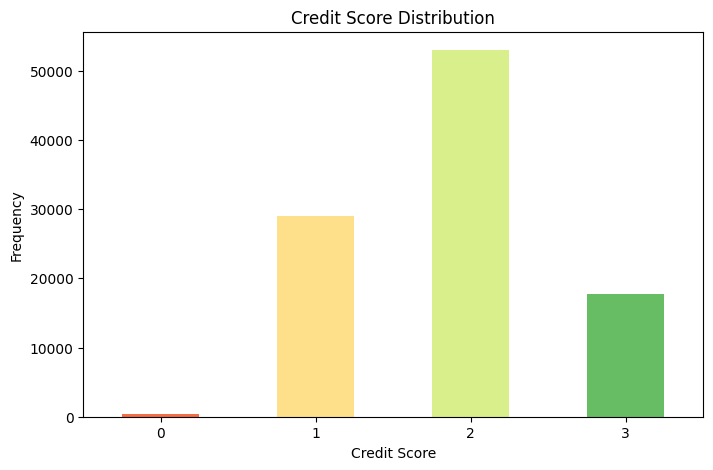

In [16]:
# Calculate the counts and sort by Credit_Score (expected to be 0, 1, 2, 3)
counts = raw_df['Credit_Score'].value_counts().sort_index()

# Create a colormap that maps 0 to red and 3 to green
cmap = sns.color_palette("RdYlGn", n_colors=4)
colors = [cmap[i] for i in range(4)]

# Create a bar plot for the Credit_Score distribution
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=colors)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution')
plt.xticks(rotation=0)
plt.show()

---

## Handling Missing and Incorrect Values

In [17]:
# Create a copy of the 'Credit_Score' column
credit_score_df = raw_df['Credit_Score'].copy()

# Remove the 'ID', 'SSN' and 'Name' column from the DataFrame
df.drop(columns=['ID', 'SSN', 'Credit_Score'], inplace=True, axis=1)
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,_,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS_0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,NaN,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS_0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


In [18]:
# Find all the columns that contain underscores in their values
underscore_columns = []
for col in df.columns:
    # Check if column contains any string values
    if df[col].dtype == 'object' and df[col].astype(str).str.contains('_').any():
            underscore_columns.append(col)

print("Columns with underscores:", underscore_columns)

# Clean underscores from all columns identified except 'Customer_ID' and 'Occupation' (assuming these are the columns you want to keep underscores in)
for col in underscore_columns:
    if col != 'Customer_ID' or col != 'Occupation':
        df[col] = df[col].apply(lambda x: x.replace('_','') if isinstance(x, str) else x)

# Fix "Credit_Mix" empty strings
df['Credit_Mix'] = df['Credit_Mix'].replace('', np.nan)
df

Columns with underscores: ['Customer_ID', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Amount_invested_monthly']


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,NaN,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,NaN,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,NaN,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


In [19]:
# Finding the uniform columns in the DataFrame
def uniform_columns(df, chunk_size=8):
    chunks_total = len(df) // chunk_size
    uniform_columns = []

    for col in df.columns:
        uniform_count = 0
        for i in range(chunks_total):
            chunk = df.iloc[i*chunk_size:(i+1)*chunk_size]
            non_na_values = set(chunk[col].dropna())
            if len(non_na_values) <= 1:
                uniform_count += 1
        if uniform_count == chunks_total:
            uniform_columns.append(col)
    return uniform_columns

uniform_col = uniform_columns(df,8)
uniform_col

['Customer_ID',
 'Name',
 'Street',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Outstanding_Debt']

### Customer ID

In [20]:
# Process the DataFrame in chunks of 8 rows
chunk_size = 8

# Fill the Customer_ID column with the mode value of each chunk
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    chunk_indices = df.index[start:end]
    chunk = df.loc[chunk_indices]
    # For each specified column, calculate the mode and update the chunk rows
    mode_value = chunk['Customer_ID'].mode().iloc[0]
    df.loc[chunk_indices, 'Customer_ID'] = mode_value
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,NaN,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,NaN,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


### Uniform Columns (Name, Street, Occupation, Type_of_Loan, Outstanding_Debt)

In [21]:
# Create a copy of the DataFrame with only the uniform columns
uniform_df = df[uniform_col].copy()

# For each uniform column fill the missing values with the mode of each grouped Customer_ID
for col in uniform_df.columns:
    if col != 'Customer_ID':
        uniform_df[col] = uniform_df.groupby('Customer_ID')[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        df[col] = uniform_df[col]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Num of Loans

In [22]:
# Remake the Num_of_Loan column by counting each loan type in the Type_of_Loan column
df['Num_of_Loan'] = df['Type_of_Loan'].fillna("").apply(
    lambda x: len([item for item in x.split(",") if item.strip()]))
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Type of Loans

In [23]:
# Fill fixed NaN values with "No Loan"
df['Type_of_Loan'] = df['Type_of_Loan'].replace(np.nan, "No Loan")
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### City

In [24]:
# Considered that 'Street' is a uniform column we can fill the missing values in 'City' in the same way and fix the errors in the 'City' column
city_df = df[['Customer_ID', 'City']].copy()

# First, get the mode of 'City' for each customer ID group
city_modes = city_df.groupby('Customer_ID')['City'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Marking error values that don't match the mode of the group as NaN
city_df['City'] = city_df.apply(lambda x: 
    np.nan if (pd.notnull(x['City']) and x['City'] != city_modes[x['Customer_ID']]) 
    else x['City'], axis=1)

# Filling all NaN values with the mode of the group
city_df['City'] = city_df.apply(lambda x: 
    city_modes[x['Customer_ID']] if (pd.isnull(x['City']) and x['Customer_ID'] in city_modes)
    else x['City'], axis=1)

# Updating the original DataFrame with the cleaned 'City' column
df['City'] = city_df['City']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Month

In [25]:
# Define month encoding
month_to_number = { "January": 1,
                    "February": 2,
                    "March": 3,
                    "April": 4,
                    "May": 5,
                    "June": 6,
                    "July": 7,
                    "August": 8}

# Encode the known months
df["Month"] = df["Month"].map(month_to_number)

# Fill in the missing values using the repeating sequence 1-8
encoded_cycle = list(islice(cycle(range(1, 9)), len(df)))
df["Month"] = encoded_cycle
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Credit_History_Age

In [26]:
# Turning strings into (years, months)
def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan
    parts = age_str.split()  # e.g. ["22", "Years", "and", "1", "Months"]
    return int(parts[0]) * 12 + int(parts[3])

# Apply the function to the "Credit_History_Age" column
history_df = df[['Customer_ID', 'Credit_History_Age']].copy()
history_df['Credit_History_Age'] = history_df['Credit_History_Age'].apply(parse_age)

# Fill the missing values in the "Credit_History_Age"
for start in range(0, len(history_df), 8):
    block_idx = range(start, start + 8)
    block = history_df.loc[block_idx, 'Credit_History_Age']
    
    # find the first non-null
    non_null = block.dropna()
    if not non_null.empty:
        first_idx = non_null.index[0]
        first_val = non_null.iloc[0]
        # position within block
        rel_pos = first_idx - start
        start_age = first_val - rel_pos
    else:
        # if all are NaN, assume they started at month 1
        start_age = 1
    
    # fill in 0..7 with start_age..start_age+7
    history_df.loc[block_idx, 'Credit_History_Age'] = [
        start_age + i for i in range(8)
    ]

# Update the original DataFrame with the cleaned 'Credit_History_Age' column
df['Credit_History_Age'] = history_df['Credit_History_Age']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Payment_of_Min_Amount

In [27]:
# Fix the errors in the 'Payment_of_Min_Amount' column
payment_df = df[['Customer_ID', 'Payment_of_Min_Amount']].copy()

# Turn the 'NM' values into NaN
payment_df['Payment_of_Min_Amount'] = payment_df['Payment_of_Min_Amount'].replace('NM', np.nan)

# First, get the mode of 'Payment_of_Min_Amount' for each customer ID group
payment_modes = payment_df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Marking error values that don't match the mode of the group as NaN
payment_df['Payment_of_Min_Amount'] = payment_df.apply(lambda row: 
    np.nan if (pd.notnull(row['Payment_of_Min_Amount']) and 
                row['Payment_of_Min_Amount'] != payment_modes[row['Customer_ID']]) 
    else row['Payment_of_Min_Amount'], axis=1)

# Filling all NaN values with the mode of the group
payment_df['Payment_of_Min_Amount'] = payment_df.apply(lambda row: 
    payment_modes[row['Customer_ID']] if (pd.isnull(row['Payment_of_Min_Amount']) and 
                                        row['Customer_ID'] in payment_modes)
    else row['Payment_of_Min_Amount'], axis=1)

# Updating the original DataFrame with the cleaned 'Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'] = payment_df['Payment_of_Min_Amount']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Age

In [28]:
# Fix the errors in the 'Age' column
age_df = df[['Customer_ID', 'Age']].copy()

def age_fix(age_series):
    corrected = []
    age1 = None  # The first valid age
    age2 = None  # The second valid age 

    for val in age_series:
        # Decide whether this entry is valid
        if pd.isna(val) or val < 13 or val > 80:
            # invalid or missing -> fill with known age if possible
            if age1 is None:
                # no known valid age yet
                corrected.append(np.nan)
            elif age2 is None:
                # we've only established age1 so far
                corrected.append(age1)
            else:
                # we've already switched to age2
                corrected.append(age2)
        else:
            # val is a valid age
            if age1 is None:
                # first valid age we see
                age1 = val
                corrected.append(val)
            else:
                # already have age1
                if val == age1:
                    # same as first age
                    if age2 is None:
                        corrected.append(age1)
                    else:
                        # we already switched to age2, so ignore going "back" to age1
                        corrected.append(age2)
                else:
                    # val is a different age
                    if age2 is None:
                        # first time we see a new age -> set age2
                        age2 = val
                        corrected.append(val)
                    else:
                        # can't have a third age -> stick to age2
                        corrected.append(age2)
    # Fill in leading/trailing NaNs
    corrected = pd.Series(corrected).ffill().bfill().values
    return corrected

# Loop explicitly over each group by Customer_ID and update the age_df DataFrame
for customer, group in age_df.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = age_fix(group['Age'])
    age_df.loc[group_index, 'Age'] = corrected_values

# Updating the original DataFrame with the cleaned 'Age' column
df['Age'] = age_df['Age']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Annual Income

In [29]:
# Copy the 'Annual_Income' column to a new DataFrame
df_annual = df[['Customer_ID','Annual_Income']].copy()

# Transform the 'Annual_Income' column to float
df_annual['Annual_Income'] = df_annual['Annual_Income'].astype(float).round(2)

distribution_df = df_annual["Annual_Income"].value_counts().sort_index().reset_index()
distribution_df.columns = ['value', 'count']

# show the average value of the groupes that have the same count
average_distribution = distribution_df.groupby('count')['value'].mean().reset_index().round(2)
average_distribution.columns = ['count', 'average_value']

# Column with number of times each count appears
average_distribution['count_appearances'] = average_distribution['count'].map(
    distribution_df['count'].value_counts().to_dict()
)
average_distribution

,count,average_value,count_appearances
0,1,12576843.76,905
1,3,59084.38,5
2,4,54363.22,73
3,5,51837.77,570
4,6,50079.30,2077
5,7,51169.93,4795
6,8,49891.45,4952
7,12,17816.75,1
8,13,36585.12,1
9,14,32766.68,6


In [30]:
# Identify Annual_Income values with frequency below 3
value_counts = df_annual["Annual_Income"].value_counts()
to_nan = value_counts[value_counts < 3].index

# Replace those values with pd.NA in df_annual
df_annual.loc[df_annual["Annual_Income"].isin(to_nan), "Annual_Income"] = pd.NA

# Check if the column is uniform
uniform_columns(df_annual, 8)

['Customer_ID', 'Annual_Income']

In [31]:
# For each uniform column fill the missing values with the mode of each grouped Customer_ID
df_annual["Annual_Income"] = df_annual.groupby("Customer_ID")["Annual_Income"].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

# Fill the missing values in the original DataFrame with the cleaned values
df["Annual_Income"] = df_annual["Annual_Income"]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Monthly Inhand Salary

In [32]:
# Create a copy of the 'Monthly_Inhand_Salary' column
df_month = df[["Monthly_Inhand_Salary"]].copy().astype(float).round(2)

# Check how many columns are uniform in the column 'Monthly_Inhand_Salary'
uniform_count = 0
chunks_total = len(df_month) // chunk_size
for i in range(chunks_total):
    chunk = df_month.iloc[i*chunk_size:(i+1)*chunk_size]
    non_na_values = set(chunk["Monthly_Inhand_Salary"].dropna())
    # Count as uniform if there are no non-NaN values or exactly one unique value.
    if len(non_na_values) <= 1:
        uniform_count += 1
non_uniform_count = chunks_total - uniform_count
print(f"Uniform Chunks = {uniform_count}, Non-Uniform Chunks = {non_uniform_count}")

Uniform Chunks = 11785, Non-Uniform Chunks = 715


In [33]:
value_count_distribution = {}

for start in range(0, len(df_month), chunk_size):
    chunk = df_month.iloc[start:start+chunk_size]
    # Count the distinct non-NaN values in the chunk for the "Annual_Income" column
    possible_values = set(chunk["Monthly_Inhand_Salary"].dropna())
    count = len(possible_values)
    value_count_distribution[count] = value_count_distribution.get(count, 0) + 1

# Print the results sorted by the number of possible values.
for possible_val, chunk_count in sorted(value_count_distribution.items()):
    print(f"{chunk_count} chunks with {possible_val} possible value{'s' if possible_val != 1 else ''}")

11785 chunks with 1 possible value
715 chunks with 2 possible values


In [34]:
# Create a DataFrame with Customer_ID and Monthly_Inhand_Salary
df_month = df[['Customer_ID', 'Monthly_Inhand_Salary']].copy()
df_month['Monthly_Inhand_Salary'] = df_month['Monthly_Inhand_Salary'].astype(float).round(2)

def NaN_imputer(series):
    corrected = []
    first_valid = None  # The first valid salary
    second_valid = None  # The second valid salary

    for val in series:
        # Define an invalid salary (modify this condition as needed)
        if pd.isna(val) or val < 0:
            if first_valid is None:
                corrected.append(np.nan)
            elif second_valid is None:
                corrected.append(first_valid)
            else:
                corrected.append(second_valid)
        else:
            if first_valid is None:
                first_valid = val
                corrected.append(val)
            else:
                if val == first_valid:
                    if second_valid is None:
                        corrected.append(first_valid)
                    else:
                        corrected.append(second_valid)
                else:
                    if second_valid is None:
                        second_valid = val
                        corrected.append(val)
                    else:
                        corrected.append(second_valid)
    # Fill in leading/trailing NaNs if any
    corrected = pd.Series(corrected).ffill().bfill().values
    return corrected

# Process each group by 'Customer_ID'
for customer, group in df_month.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = NaN_imputer(group['Monthly_Inhand_Salary'])
    df_month.loc[group_index, 'Monthly_Inhand_Salary'] = corrected_values

# Update the original DataFrame's column with the cleaned values   
df['Monthly_Inhand_Salary'] = df_month['Monthly_Inhand_Salary']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Num Bank Accounts

In [35]:
df_bank_account = df[['Num_Bank_Accounts']]
df_bank_account.loc[(df_bank_account['Num_Bank_Accounts'] > 11) | (df_bank_account['Num_Bank_Accounts'] < 0),'Num_Bank_Accounts'] = np.nan
df["Num_Bank_Accounts"] = df_bank_account["Num_Bank_Accounts"]

/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/824910121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_account.loc[(df_bank_account['Num_Bank_Accounts'] > 11) | (df_bank_account['Num_Bank_Accounts'] < 0),'Num_Bank_Accounts'] = np.nan


In [36]:
df_bank_account = df[['Customer_ID', 'Num_Bank_Accounts']].copy()

for customer, group in df_bank_account.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = NaN_imputer(group['Num_Bank_Accounts'])
    df_bank_account.loc[group_index, 'Num_Bank_Accounts'] = corrected_values

df['Num_Bank_Accounts'] = df_bank_account['Num_Bank_Accounts']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Num Credit card

In [37]:
df_Credit_Card = df[['Num_Credit_Card']]

df_Credit_Card.loc[
    (df_Credit_Card['Num_Credit_Card'] > 11) | (df_Credit_Card['Num_Credit_Card'] < 0),
    'Num_Credit_Card'
] = np.nan


/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/3067772878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Credit_Card.loc[


In [38]:
value_count_distribution = {}

for start in range(0, len(df_Credit_Card), chunk_size):
    chunk = df_Credit_Card.iloc[start:start+chunk_size]
    # Count the distinct non-NaN values in the chunk for the "Annual_Income" column
    possible_values = set(chunk["Num_Credit_Card"].dropna())
    count = len(possible_values)
    value_count_distribution[count] = value_count_distribution.get(count, 0) + 1

# Print the results sorted by the number of possible values.
for possible_val, chunk_count in sorted(value_count_distribution.items()):
    print(f"{chunk_count} chunks with {possible_val} possible value{'s' if possible_val != 1 else ''}")

df["Num_Credit_Card"] = df_Credit_Card['Num_Credit_Card']

12199 chunks with 1 possible value
301 chunks with 2 possible values


In [39]:
# Create a DataFrame with Customer_ID and 
df_num_credit_card = df[['Customer_ID', 'Num_Credit_Card']].copy()

# Process each group by 'Customer_ID'
for customer, group in df_num_credit_card.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = NaN_imputer(group['Num_Credit_Card'])
    df_num_credit_card.loc[group_index, 'Num_Credit_Card'] = corrected_values

# Update the original DataFrame's column with the cleaned values   
df['Num_Credit_Card'] = df_num_credit_card['Num_Credit_Card']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Interest Rate

In [40]:
df_Interest = df[['Interest_Rate']]
df_Interest.loc[(df_Interest['Interest_Rate'] > 35),'Interest_Rate'] = np.nan

# Create a DataFrame with Customer_ID and 
df_Interest = df[['Customer_ID', 'Interest_Rate']].copy()

# Process each group by 'Customer_ID'
for customer, group in df_Interest.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = NaN_imputer(group['Interest_Rate'])
    df_Interest.loc[group_index, 'Interest_Rate'] = corrected_values

# Update the original DataFrame's column with the cleaned values   
df['Interest_Rate'] = df_Interest['Interest_Rate']
df

/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/487928979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Interest.loc[(df_Interest['Interest_Rate'] > 35),'Interest_Rate'] = np.nan


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Delay from due date

In [41]:
df_delay_date = df[['Delay_from_due_date']]

def impute_chunk_mean_round0(df, chunk_size=8):
    imputed_df = pd.DataFrame()
    for start in range(0, len(df), chunk_size):
        chunk = df.iloc[start:start+chunk_size].copy()
        # Select numeric columns in the chunk
        num_cols = chunk.select_dtypes(include=[np.number]).columns
        if len(num_cols) > 0:
            imputer = SimpleImputer(strategy='mean')
            # Impute missing values with the mean of the non-NaN values in the chunk
            chunk[num_cols] = imputer.fit_transform(chunk[num_cols])
            # Round imputed values to the nearest unit (0 decimals)
            chunk[num_cols] = chunk[num_cols].round(0)
        imputed_df = pd.concat([imputed_df, chunk])
    return imputed_df

df_delay_date = impute_chunk_mean_round0(df_delay_date, chunk_size=8)

df["Delay_from_due_date"] = df_delay_date["Delay_from_due_date"]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,NaN,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Num of Delayed Payment

In [42]:
df_Delayed_Pay = df[['Num_of_Delayed_Payment']]
df_Delayed_Pay['Num_of_Delayed_Payment'] = pd.to_numeric(df_Delayed_Pay['Num_of_Delayed_Payment'], errors='coerce')
df_Delayed_Pay.loc[
    (df_Delayed_Pay['Num_of_Delayed_Payment'] < 0) | (df_Delayed_Pay['Num_of_Delayed_Payment'] > 29),
    'Num_of_Delayed_Payment'
] = np.nan
df_Delayed_Pay = impute_chunk_mean_round0(df_Delayed_Pay, chunk_size=8)
df["Num_of_Delayed_Payment"] = df_Delayed_Pay["Num_of_Delayed_Payment"]
df

/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/3641052089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delayed_Pay['Num_of_Delayed_Payment'] = pd.to_numeric(df_Delayed_Pay['Num_of_Delayed_Payment'], errors='coerce')
/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/3641052089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Delayed_Pay.loc[


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.5,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.5,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.5,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Changed Credit Limit

In [43]:
df_changed_credit_limit = df[['Changed_Credit_Limit']]
df_changed_credit_limit['Changed_Credit_Limit'] = df_changed_credit_limit['Changed_Credit_Limit'].replace("", np.nan)
df_changed_credit_limit['Changed_Credit_Limit'] = df_changed_credit_limit['Changed_Credit_Limit'].astype(float)


def impute_chunk_mean_round2(df, chunk_size=8):
    imputed_df = pd.DataFrame()
    for start in range(0, len(df), chunk_size):
        chunk = df.iloc[start:start+chunk_size].copy()
        # Select numeric columns in the chunk
        num_cols = chunk.select_dtypes(include=[np.number]).columns
        if len(num_cols) > 0:
            imputer = SimpleImputer(strategy='mean')
            # Impute missing values with the mean of the non-NaN values in the chunk
            chunk[num_cols] = imputer.fit_transform(chunk[num_cols])
            # Round imputed values to the nearest unit (0 decimals)
            chunk[num_cols] = chunk[num_cols].round(2)
        imputed_df = pd.concat([imputed_df, chunk])
    return imputed_df

df_changed_credit_limit = impute_chunk_mean_round2(df_changed_credit_limit, chunk_size=8)
df["Changed_Credit_Limit"] = df_changed_credit_limit["Changed_Credit_Limit"]
df

/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/1630658477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed_credit_limit['Changed_Credit_Limit'] = df_changed_credit_limit['Changed_Credit_Limit'].replace("", np.nan)
/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/1630658477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed_credit_limit['Changed_Credit_Limit'] = df_changed_credit_limit['Changed_Credit_Limit'].astype(float)


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,10.27,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.50,NaN,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.50,NaN,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Num Credit Inquiries

In [44]:
df_Credi_Inq = df[['Num_Credit_Inquiries']]
df_Credi_Inq.loc[(df_Credi_Inq['Num_Credit_Inquiries'] > 17),'Num_Credit_Inquiries'] = np.nan

def impute_chunk_mean_round0(df, chunk_size=8):
    imputed_df = pd.DataFrame()
    for start in range(0, len(df), chunk_size):
        chunk = df.iloc[start:start+chunk_size].copy()
        # Select numeric columns in the chunk
        num_cols = chunk.select_dtypes(include=[np.number]).columns
        if len(num_cols) > 0:
            imputer = SimpleImputer(strategy='mean')
            # Impute missing values with the mean of the non-NaN values in the chunk
            chunk[num_cols] = imputer.fit_transform(chunk[num_cols])
            # Round imputed values to the nearest unit (0 decimals)
            chunk[num_cols] = chunk[num_cols].round(0)
        imputed_df = pd.concat([imputed_df, chunk])
    return imputed_df

df_Credi_Inq = impute_chunk_mean_round0(df_Credi_Inq, chunk_size=8)

df["Num_Credit_Inquiries"] = df_Credi_Inq["Num_Credit_Inquiries"]
df

/var/folders/k_/s1y99_w10p160dfzw5445lwh0000gn/T/ipykernel_24410/3642542961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Credi_Inq.loc[(df_Credi_Inq['Num_Credit_Inquiries'] > 17),'Num_Credit_Inquiries'] = np.nan


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.944960,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,10.27,4.0,Good,809.98,28.609352,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,NaN,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.797347,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,251.67258219721603


### Credit Utilization Ratio


In [45]:
df_credit_utilization_ratio = pd.DataFrame(df['Credit_Utilization_Ratio'].round(2))
df_credit_utilization_ratio = impute_chunk_mean_round2(df_credit_utilization_ratio, chunk_size=8)
df["Credit_Utilization_Ratio"] = df_credit_utilization_ratio["Credit_Utilization_Ratio"]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.82,265.0,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.94,266.0,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,10.27,4.0,Good,809.98,28.61,267.0,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,26.56,268.0,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.80,269.0,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.50,3.0,Good,502.38,34.66,378.0,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.50,3.0,Good,502.38,40.57,379.0,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.50,3.0,Good,502.38,41.26,380.0,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.50,3.0,Good,502.38,33.64,381.0,No,251.67258219721603


### Amount Invested Monthly

In [46]:
df_amount_invested_monthly = pd.DataFrame(pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').round(2))
df_amount_invested_monthly.replace(10000, np.nan, inplace=True)
df_amount_invested_monthly = impute_chunk_mean_round2(df_amount_invested_monthly, chunk_size=8)
df["Amount_invested_monthly"] = df_amount_invested_monthly["Amount_invested_monthly"]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.82,265.0,No,80.42
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.94,266.0,No,118.28
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,10.27,4.0,Good,809.98,28.61,267.0,No,81.70
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,26.56,268.0,No,199.46
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.80,269.0,No,41.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.50,3.0,Good,502.38,34.66,378.0,No,60.97
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.50,3.0,Good,502.38,40.57,379.0,No,54.19
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.50,3.0,Good,502.38,41.26,380.0,No,24.03
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.50,3.0,Good,502.38,33.64,381.0,No,251.67


### Outstanding Debt

In [47]:
# Turn 'Outstanding_Debt' into float in df
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors='coerce').round(2)
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,11.27,4.0,Good,809.98,26.82,265.0,No,80.42
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,-1.0,6.0,11.27,4.0,Good,809.98,31.94,266.0,No,118.28
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,3.0,7.0,10.27,4.0,Good,809.98,28.61,267.0,No,81.70
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,5.0,4.0,6.27,4.0,Good,809.98,26.56,268.0,No,199.46
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,6.0,11.27,4.0,Good,809.98,24.80,269.0,No,41.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,23.0,7.0,11.50,3.0,Good,502.38,34.66,378.0,No,60.97
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,18.0,7.0,11.50,3.0,Good,502.38,40.57,379.0,No,54.19
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,27.0,6.0,11.50,3.0,Good,502.38,41.26,380.0,No,24.03
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,20.0,6.0,11.50,3.0,Good,502.38,33.64,381.0,No,251.67


In [48]:
nan_counts = df.isna().sum()
print("Missing values by column:")
nan_counts

Missing values by column:


Customer_ID                 0
Month                       0
Name                        0
City                        0
Street                      0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
dtype: int64

--- 
## EDA (Post Data Handling)

In [49]:
# Merge the DataFrame with the 'Credit_Score' column
merged_df = pd.concat([df, credit_score_df], axis=1)
merged_df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,7.0,11.27,4.0,Good,809.98,26.82,265.0,No,80.42,3
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,11.27,4.0,Good,809.98,31.94,266.0,No,118.28,3
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,7.0,10.27,4.0,Good,809.98,28.61,267.0,No,81.70,3
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,4.0,6.27,4.0,Good,809.98,26.56,268.0,No,199.46,3
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.84,3.0,...,6.0,11.27,4.0,Good,809.98,24.80,269.0,No,41.42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,7.0,11.50,3.0,Good,502.38,34.66,378.0,No,60.97,1
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,7.0,11.50,3.0,Good,502.38,40.57,379.0,No,54.19,1
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,6.0,11.50,3.0,Good,502.38,41.26,380.0,No,24.03,1
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.42,4.0,...,6.0,11.50,3.0,Good,502.38,33.64,381.0,No,251.67,2


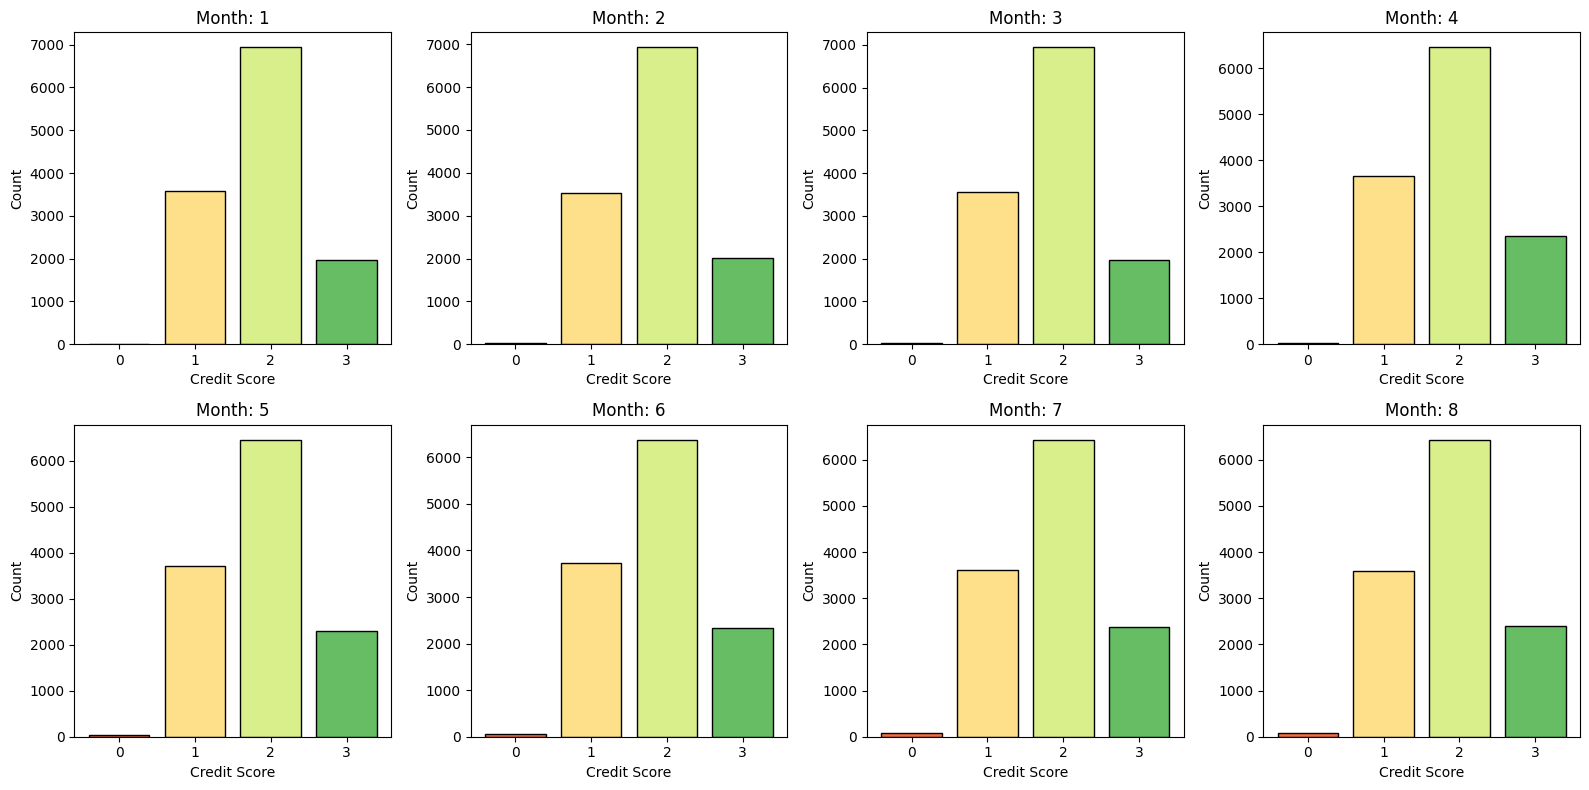

In [50]:
# Create subplots: one bar plot per month for the credit_score distribution with different colors for each credit score
months = sorted(merged_df['Month'].unique())
n_months = len(months)
ncols = 4
nrows = n_months // ncols + int(n_months % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
axes = axes.flatten()

for i, month in enumerate(months):
    monthly_data = merged_df[merged_df['Month'] == month]
    count_values = monthly_data['Credit_Score'].value_counts().sort_index()
    # Create a color palette with a different color per credit score
    axes[i].bar(count_values.index.astype(str), count_values.values, color=colors, edgecolor='black')
    axes[i].set_title(f'Month: {month}')
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel('Count')
    axes[i].grid(False)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

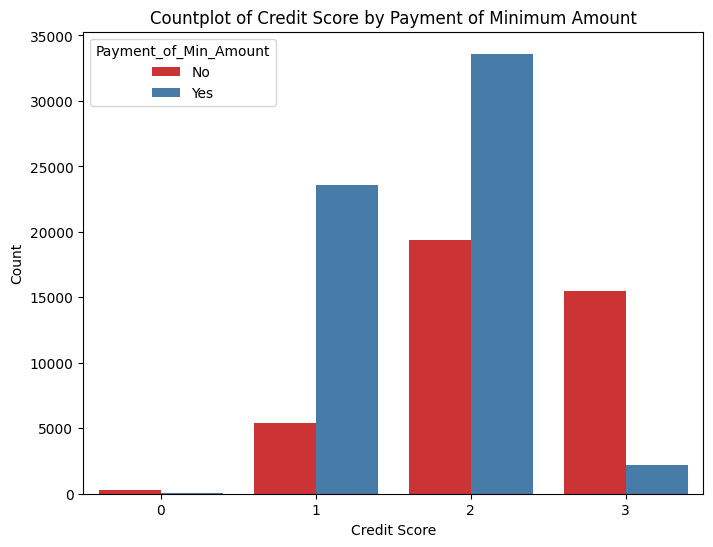

In [51]:
# Create a countplot of 'Credit_Score' by 'Payment_of_Min_Amount'
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_Score', hue='Payment_of_Min_Amount', data=merged_df, palette='Set1')
plt.title("Countplot of Credit Score by Payment of Minimum Amount")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

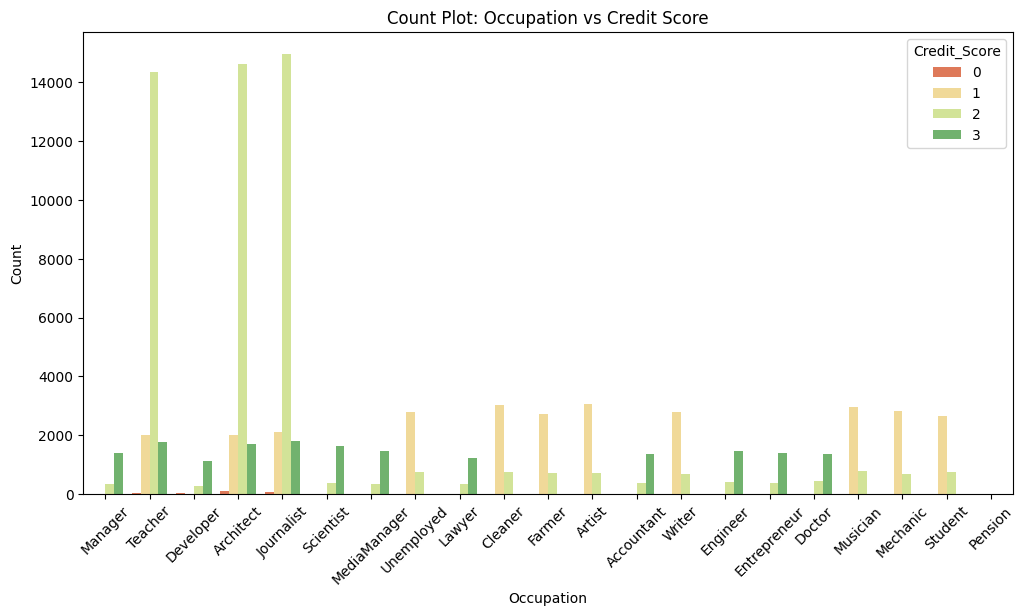

In [52]:
# Create a countplot of 'Credit_Score' by 'Occupation'
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Occupation', hue='Credit_Score', palette=colors)
plt.title('Count Plot: Occupation vs Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

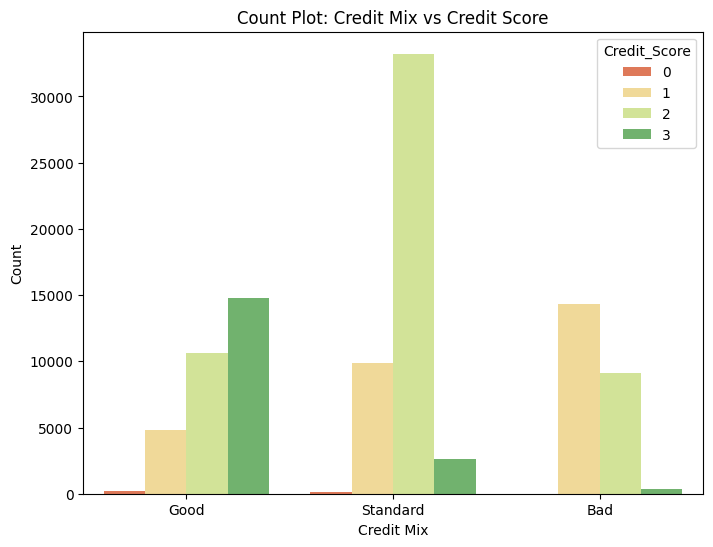

In [53]:
# Create a countplot of 'Credit_Score' by 'Credit_Mix'
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Credit_Mix', hue='Credit_Score', palette=colors)
plt.title("Count Plot: Credit Mix vs Credit Score")
plt.xlabel("Credit Mix")
plt.ylabel("Count")
plt.show()

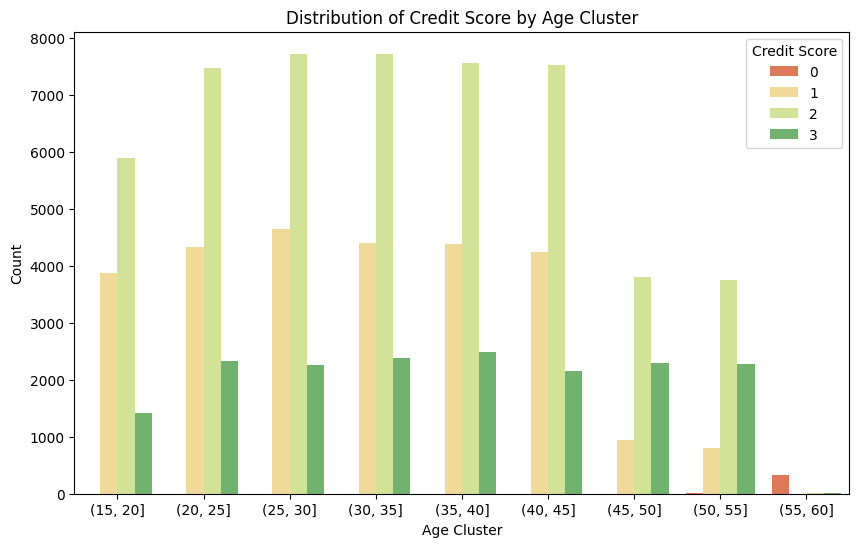

In [54]:
bin_edges = [15, 20 ,25, 30, 35, 40, 45, 50, 55, 60]

# Create a new DataFrame with the 'Age' column and assign it to 'age_bin'
temp_df = merged_df.assign(age_bin=pd.cut(merged_df['Age'], bins=bin_edges))

# Create a countplot of 'Credit_Score' by 'age_bin'
plt.figure(figsize=(10, 6))
sns.countplot(x='age_bin', hue='Credit_Score', data=temp_df, palette=colors)
plt.xlabel("Age Cluster")
plt.ylabel("Count")
plt.title("Distribution of Credit Score by Age Cluster")
plt.legend(title='Credit Score', loc='upper right')
plt.show()

--- 
## Encoding and Correlation Assesment

In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int64  
 2   Name                      100000 non-null  object 
 3   City                      100000 non-null  object 
 4   Street                    100000 non-null  object 
 5   Age                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [56]:
loan_types = set()
for val in merged_df['Type_of_Loan'].dropna():
    loans = val.replace(' and ', ',').split(',')
    for loan in loans:
        loan = loan.strip()
        if loan:
            loan_types.add(loan)

unique_loan_types = list(loan_types)

def count_loans(entry):
    if pd.isna(entry):
        return pd.Series({loan: 0 for loan in unique_loan_types})
    tokens = [token.strip().lower() for token in entry.split(',') if token.strip()]
    counts = {}
    for loan in unique_loan_types:
        counts[loan] = tokens.count(loan.lower())
    return pd.Series(counts)

loan_counts = merged_df['Type_of_Loan'].apply(count_loans)

merged_df = pd.concat([merged_df, loan_counts], axis=1)
merged_df.drop(columns=['Type_of_Loan'], inplace=True)

In [57]:
label_encoder = OneHotEncoder(sparse=False)
categorical_columns = ['City', 'Credit_Mix']

for col in categorical_columns:
    transformed = label_encoder.fit_transform(merged_df[[col]])
    new_cols = label_encoder.get_feature_names_out([col])
    transformed_df = pd.DataFrame(transformed, columns=new_cols, index=merged_df.index)
    merged_df = merged_df.drop(columns=[col]).join(transformed_df)


categorical_columns = ["Customer_ID", 'Name', 'Street', 'Occupation']
encoder = OrdinalEncoder()
merged_df[categorical_columns] = encoder.fit_transform(merged_df[categorical_columns])

merged_df['Payment_of_Min_Amount'] = merged_df['Payment_of_Min_Amount'].map({'No': 0, 'Yes': 1})

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  int64  
 2   Name                      100000 non-null  float64
 3   Street                    100000 non-null  float64
 4   Age                       100000 non-null  float64
 5   Occupation                100000 non-null  float64
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  int64  
 12  Delay_from_due_date       100000 non-null  float64
 13  Num_of_Delayed_Payment    100000 non-null  fl

In [59]:
merged_df.drop(columns=['Customer_ID', 'Name'], inplace=True)
merged_df

,Month,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Not Specified,Credit-Builder Loan,Student Loan,City_BadShire,City_Lonton,City_Standhampton,City_ZeroVille,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,1,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,7.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,5,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,7.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,6,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,5729.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,7,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,5729.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


--- 
## Class Imbalance Assesment

In [60]:
smote_df = merged_df.copy()
smote_df

,Month,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Not Specified,Credit-Builder Loan,Student Loan,City_BadShire,City_Lonton,City_Standhampton,City_ZeroVille,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,1,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,20.0,23.0,11.0,19114.12,1824.84,3.0,4.0,3.0,4,...,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,7.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,5,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,7.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,6,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,5729.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,7,17.0,25.0,3.0,39628.99,3359.42,4.0,6.0,5729.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
X = smote_df.drop("Credit_Score", axis=1)
y = smote_df["Credit_Score"]

cat_and_dis_col = [
    "Street", "Occupation",
    "Payment_of_Min_Amount",
    "Debt Consolidation Loan", "Not Specified", "Credit-Builder Loan", "No Loan",
    "Payday Loan", "Mortgage Loan", "Student Loan", "Home Equity Loan", "Personal Loan", "Auto Loan",
    "City_BadShire", "City_Lonton", "City_Standhampton", "City_ZeroVille",
    "Credit_Mix_Bad", "Credit_Mix_Good", "Credit_Mix_Standard", 
    "Num_Bank_Accounts", "Num_Credit_Card", "Num_of_Loan",
    "Delay_from_due_date", "Age",
    "Num_of_Delayed_Payment", "Num_Credit_Inquiries"
]

categorical_indices = [X.columns.get_loc(col) for col in cat_and_dis_col]

sampling_strategy = {
    0: 10000,    
    1: 28953,   
    3: 17721,   
    2: 52974   
}

smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    sampling_strategy=sampling_strategy,
    random_state=42,
    k_neighbors = 3
)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df["Credit_Score"] = y_resampled

Before SMOTE: Counter({2: 52974, 1: 28953, 3: 17721, 0: 352})
After SMOTE: Counter({2: 52974, 1: 28953, 3: 17721, 0: 10000})


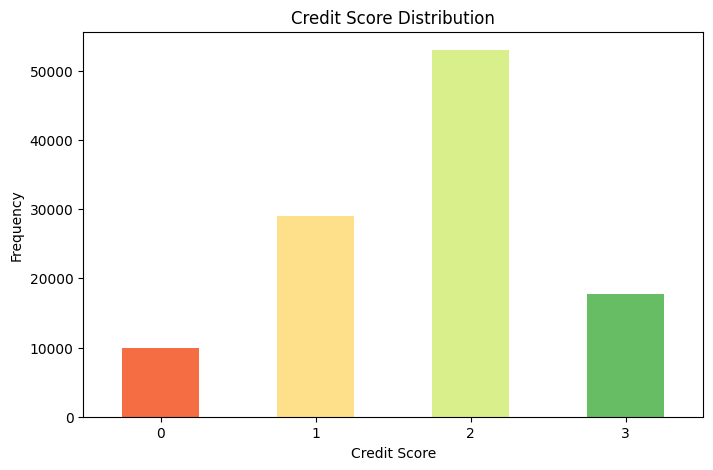

In [62]:
counts = balanced_df['Credit_Score'].value_counts().sort_index()
cmap = sns.color_palette("RdYlGn", n_colors=4)
colors = [cmap[i] for i in range(4)]

plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=colors)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution')
plt.xticks(rotation=0)
plt.show()

In [63]:
# Assuming 'balanced_df' is your final dataset with the target 'Credit_Score'
X = balanced_df.drop("Credit_Score", axis=1)
y = balanced_df["Credit_Score"]

# Split the data (using stratification for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1998    0    2    0]
 [   0 5355  436    0]
 [   3 1044 8956  592]
 [   0    8  444 3092]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.84      0.92      0.88      5791
           2       0.91      0.85      0.88     10595
           3       0.84      0.87      0.86      3544

    accuracy                           0.88     21930
   macro avg       0.90      0.91      0.90     21930
weighted avg       0.89      0.88      0.88     21930



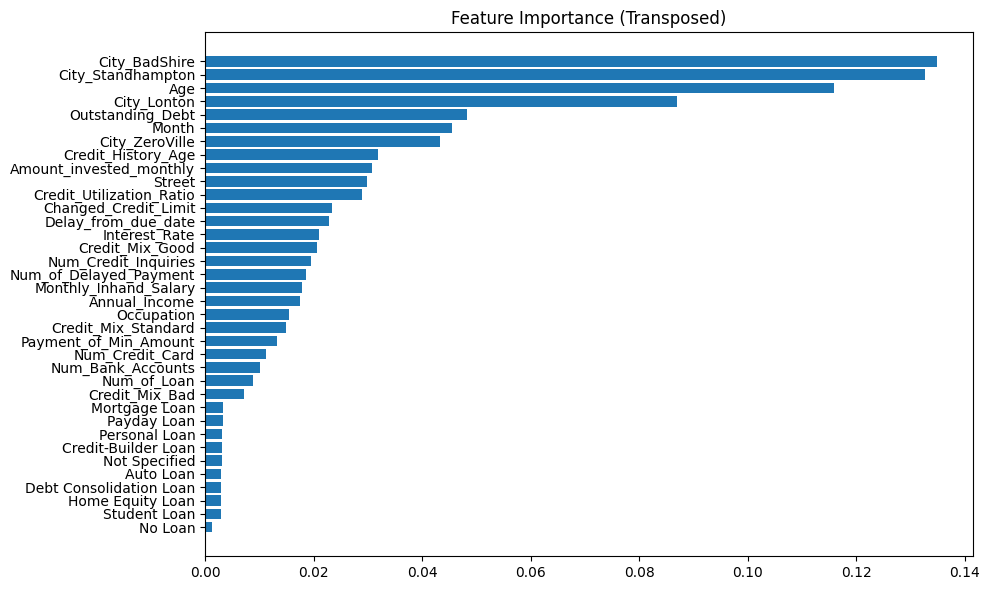

In [64]:
importances = rf_model.feature_importances_  # from the trained model
features = X.columns
indices = np.argsort(importances)  # ascending order for horizontal bar plot

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Transposed)")
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.tight_layout()
plt.show()

--- 
## Training the Credit Score Prediction model

--- 
## Results Analysis

--- 
## Dashboard